In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
#Data importing
df = pd.read_csv('28 June LR class/turboaz.csv')

In [256]:
#Removing $ signs
def applyAZN(col):
    lst = col.split()
    if 'AZN' in col:
        return float(lst[0])
    if '$' in col:
        return float(lst[0]) * 1.7
    return 0

df['Qiymet']=df['Qiymet'].apply(applyAZN)

In [257]:
df = df[['Buraxilish ili', 'Qiymet']].copy()

In [239]:
df

,Buraxilish ili,Qiymet
0,1999,12500.0
1,2014,53550.0
2,2002,11700.0
3,1998,9700.0
4,2000,12700.0
...,...,...
1323,1996,8800.0
1324,1994,6300.0
1325,1998,10900.0
1326,2000,11300.0


Coefficients after gradient descent:
w = [1.79265705e-14 8.84125328e-01]


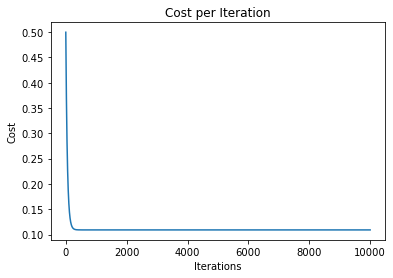

In [241]:
#Gradient descent
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.cost_history = []
        
    def fit(self, X, Y):
        m = len(Y)
        X = np.array([np.ones(len(Y)), X])
        
        self.w = np.zeros(2)
        
        for _ in range(self.num_iterations):
            y_pred = X.T.dot(self.w)
            diff = y_pred - Y
            
            dw = np.dot(X, diff) / m
            self.w -= self.learning_rate * dw
            
            cost = np.sum((diff ** 2)) / (2 * m)
            self.cost_history.append(cost)
            
    def predict(self, X):
        m = X.shape[0]
        X = np.concatenate((np.ones((m, 1)), X), axis=1) 
        return np.dot(X, self.w)


X = (df['Buraxilish ili'] - df['Buraxilish ili'].mean()) / df['Buraxilish ili'].std()
Y = (df['Qiymet'] - df['Qiymet'].mean()) / df['Qiymet'].std()

model = LinearRegressionGD(num_iterations=10000)
model.fit(X, Y)

print("Coefficients after gradient descent:")
print("w =", model.w)

plt.plot(model.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()

In [242]:
final_coef = model.w
final_coef[0]

1.7926570535907037e-14

In [243]:
#Looking at one row with its prediction
year = 2014
Qiymet = 53550.0

yearNorm = (year - df['Buraxilish ili'].mean()) / df['Buraxilish ili'].std()
yearNorm

prediction = final_coef[0] + final_coef[1]*yearNorm

In [244]:
prediction

2.3447151211661854

In [245]:
df['Qiymet'].mean()

15116.454518072293

In [246]:
df['Qiymet'].std()

13650.418974088254

In [247]:
prediction*df['Qiymet'].std() + df['Qiymet'].mean()

47122.798296870824

In [248]:
#Bringing back from normalization to actual values
df['Prediction'] = (final_coef[0]*1 + final_coef[1] *((df['Buraxilish ili'] - df['Buraxilish ili'].mean())/df['Buraxilish ili'].std())) *df.Qiymet.std() + df.Qiymet.mean()

In [249]:
#Constructing residual column
df['diff'] = (df['Prediction'] - df['Qiymet']).apply(abs)